In [1]:
__author__ = 'lisette.espin'

In [2]:
#######################################################################
# Dependencies
#######################################################################
import time
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2
from libs.mrqap import MRQAP

In [4]:
#######################################################################
# Constants
#######################################################################
NCOUNTRIES = 249
DIRECTED = True
NPERMUTATIONS = 2000

In [5]:
#######################################################################
# Functions
#######################################################################
def getMatrix(path, directed=False, log1p=False):
    matrix = np.zeros(shape=(NCOUNTRIES,NCOUNTRIES))
    with open(path, 'r') as f:
        for line in f:
            data = line.replace('\n','').split(' ')
            c1 = int(data[0])-1
            c2 = int(data[1])-1
            v = np.log1p(float(data[2])) if log1p else float(data[2])
            matrix[c1][c2] = v # real data from file
            if not DIRECTED:
                matrix[c2][c1] = v # symmetry
    print('{} loaded as a matrix!'.format(path))
    return matrix

In [6]:
#######################################################################
# Data Matrices
#######################################################################
X1 = getMatrix('data/country_trade_index.txt',DIRECTED,True)
X2 = getMatrix('data/country_distance_index.txt',DIRECTED,True)
X3 = getMatrix('data/country_colonial_index.txt',DIRECTED)
Y  = getMatrix('data/country_lang_index.txt',DIRECTED)
X = {'TRADE':X1, 'DISTANCE':X2, 'COLONIAL':X3}
Y = {'LANG':Y}
np.random.seed(1)

data/country_trade_index.txt loaded as a matrix!
data/country_distance_index.txt loaded as a matrix!
data/country_colonial_index.txt loaded as a matrix!
data/country_lang_index.txt loaded as a matrix!


In [7]:
#######################################################################
# MRQAP
#######################################################################
start_time = time.time()
mrqap = MRQAP(Y=Y, X=X, npermutations=NPERMUTATIONS, diagonal=False, directed=True)
mrqap.mrqap()
print("--- {}, {}: {} seconds ---".format('directed' if DIRECTED else 'undirected', NPERMUTATIONS, time.time() - start_time))


--- directed, 2000: 117.04163575172424 seconds ---


In [8]:
mrqap.summary()


=== Summary OLS (original) ===
                            OLS Regression Results                            
Dep. Variable:                   LANG   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     708.4
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:10:06   Log-Likelihood:                -69998.
No. Observations:               61752   AIC:                         1.400e+05
Df Residuals:                   61748   BIC:                         1.400e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.027

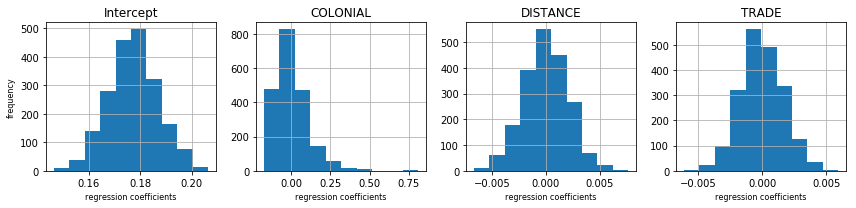

In [9]:
%matplotlib inline  
mrqap.plot('betas', fn=None)

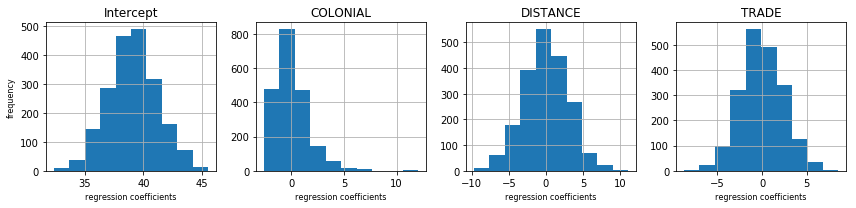

In [10]:
mrqap.plot('tvalues', fn=None)